In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io as io
import skimage.filters.rank as filt
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.io import imsave
from skimage import data, filters, color
import scipy.signal as sig
from scipy.ndimage import gaussian_filter

Pytanie 1

Filtry liniowe wykonują operacje, w których nowa wartość poksela będzie liniową kombinacją wartości sąsiednich pikseli

Filtry nieliniowe będą wykonywały operacje które są nieliniowe. Przykładowo wybierają sobie wartość mediany w sąsiedztwie danego piksela, tak jak jest to w filtrze medianowym.

Pytanie 2

Problem polega na tym że maska filtru wychodzi poza obraz, gdy znajduje się na krawędziach obrazu. Wtedy brakuje sąsiednich pikseli, co uniemożliwia zastosowanie pełnej maski. Rozwiązaniem tego problemu może być uzupełnianie obrazu przez: kopiowanie pikseli brzegowych lub wybełnianie zerami(zero-padding).

Punkty 2 - 5

c:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\VENVS\Lib\site-packages\IPython\core\interactiveshell.py:3546: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


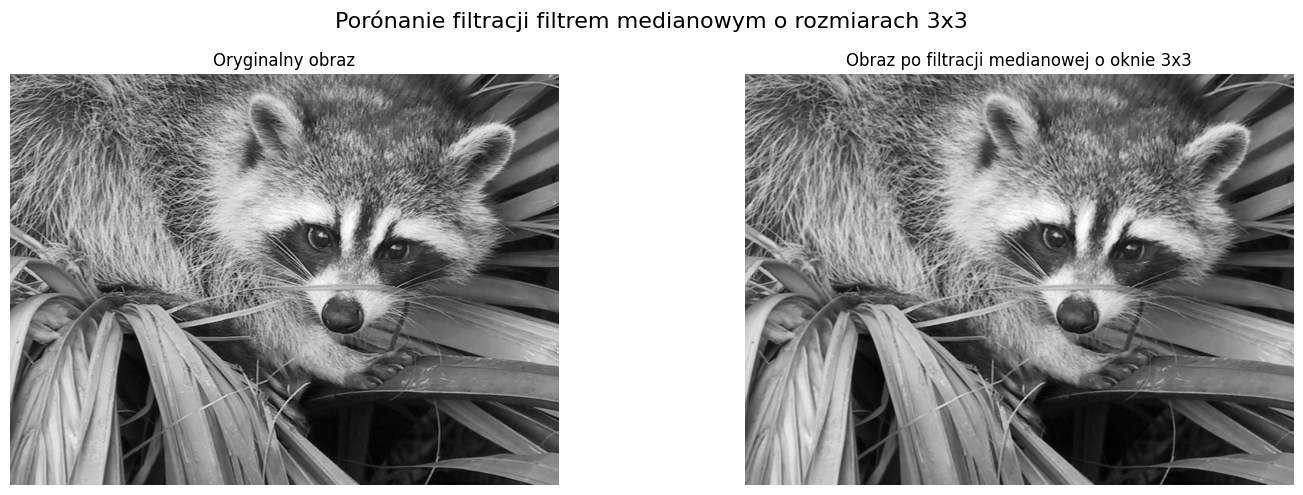

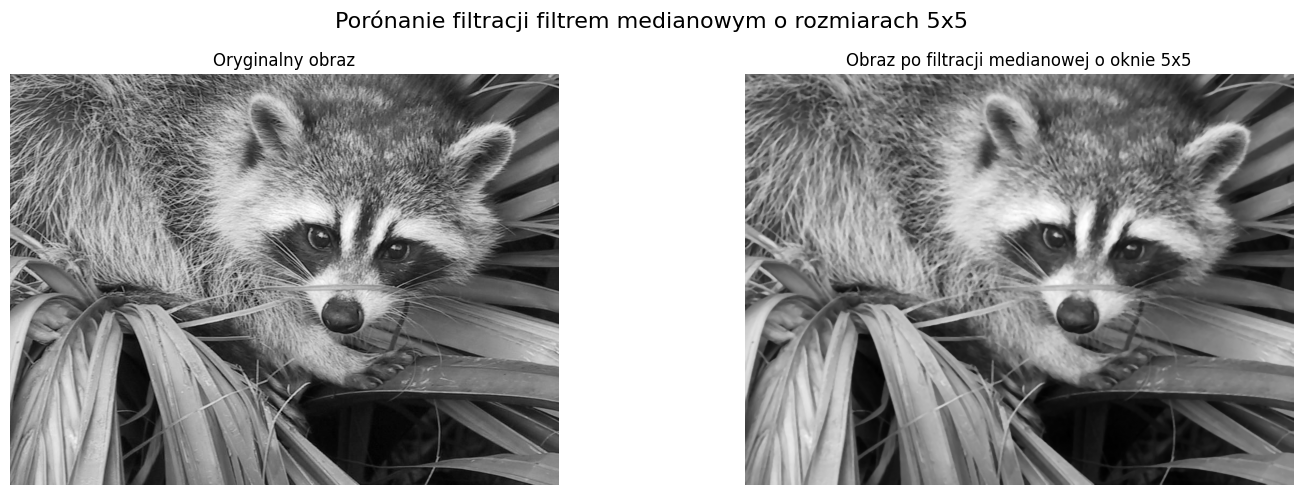

In [2]:
raccoon_path = r"C:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\lab4\dane4\raccoon.png"
szop = io.imread(raccoon_path)
szop_g = rgb2gray(szop)

# tworzenie filtru 3x3
tablica3 = np.ones((3, 3), dtype=np.uint8)
filtr_median3 = filt.median(szop_g, footprint=tablica3)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Porónanie filtracji filtrem medianowym o rozmiarach 3x3", fontsize=16)
axes[0].imshow(szop_g, cmap="gray")
axes[0].set_title("Oryginalny obraz")
axes[0].axis("off")

axes[1].imshow(filtr_median3, cmap="gray")
axes[1].set_title("Obraz po filtracji medianowej o oknie 3x3")
axes[1].axis("off")
plt.tight_layout()

# tworzenie filtru 5x5
tablica5 = np.ones((5, 5), dtype=np.uint8)
filtr_median5 = filt.median(szop_g, footprint=tablica5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Porónanie filtracji filtrem medianowym o rozmiarach 5x5", fontsize=16)
axes[0].imshow(szop_g, cmap="gray")
axes[0].set_title("Oryginalny obraz")
axes[0].axis("off")

axes[1].imshow(filtr_median5, cmap="gray")
axes[1].set_title("Obraz po filtracji medianowej o oknie 5x5")
axes[1].axis("off")
plt.tight_layout()

Pytanie 3

macież:

1/9  *  [1 1 1], [1 1 1], [1 1 1]

waga = 1/9


Pytanie 4

Podobnie jak w pytaniu wyżej wszystkie wartości będą równe: waga = 1/25 dla macieży 5 x 5

Pytanie 5 

Filtr 5 x 5 będzie powodował większe rozmycie ponieważ im większa maska, tym więcej sąsiednich pikseli będzie kiało wpływ na wartość danego piksela, co będzie skutkowało większym wygładzeniem i utratą szczegółów.

Punkty 6 - 9

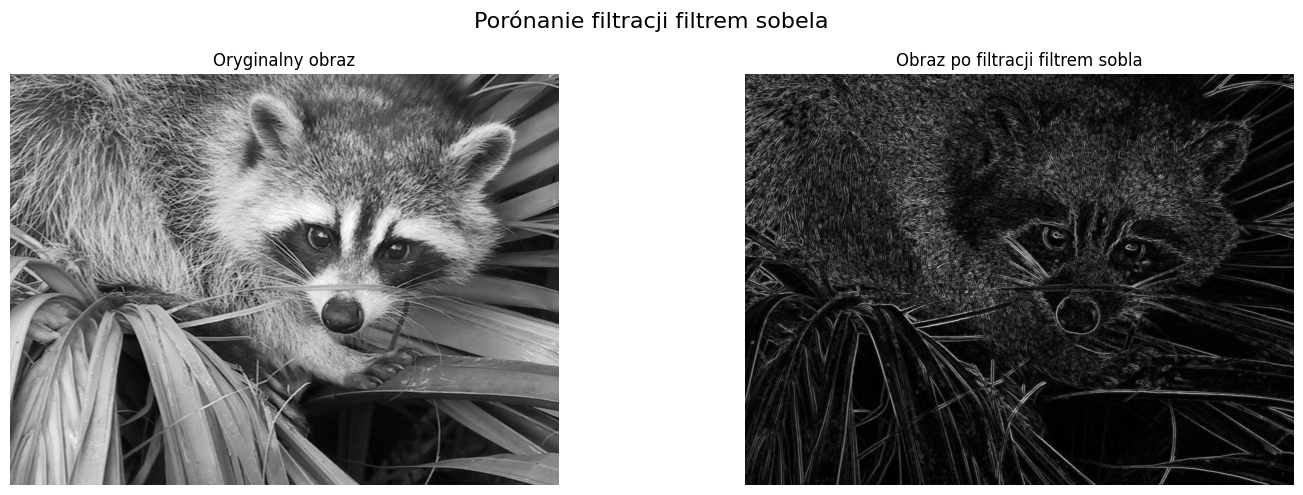

In [3]:
sobel = filters.sobel(szop_g)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Porónanie filtracji filtrem sobela", fontsize=16)
axes[0].imshow(szop_g, cmap="gray")
axes[0].set_title("Oryginalny obraz")
axes[0].axis("off")

axes[1].imshow(sobel, cmap="gray")
axes[1].set_title("Obraz po filtracji filtrem sobla")
axes[1].axis("off")
plt.tight_layout()

Punkty 10 - 12

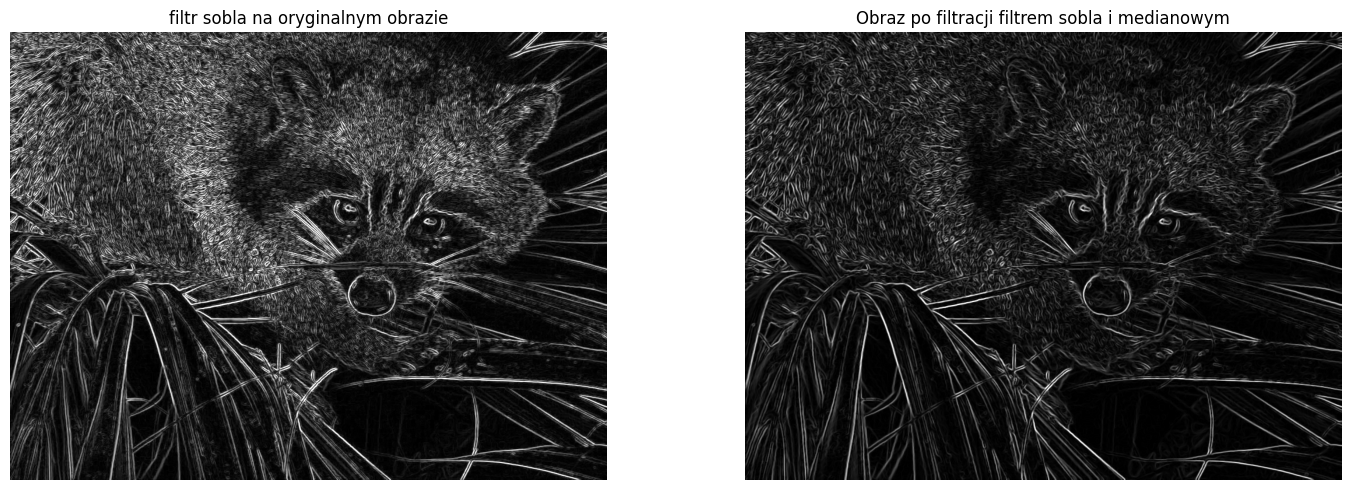

In [4]:
sobel5x5 = filters.sobel(filtr_median5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(sobel, cmap="gray",  vmin=0, vmax=0.3)
axes[0].set_title("filtr sobla na oryginalnym obrazie")
axes[0].axis("off")

axes[1].imshow(sobel5x5, cmap="gray",  vmin=0, vmax=0.3)
axes[1].set_title("Obraz po filtracji filtrem sobla i medianowym")
axes[1].axis("off")
plt.tight_layout()

Punkty 13 - 14

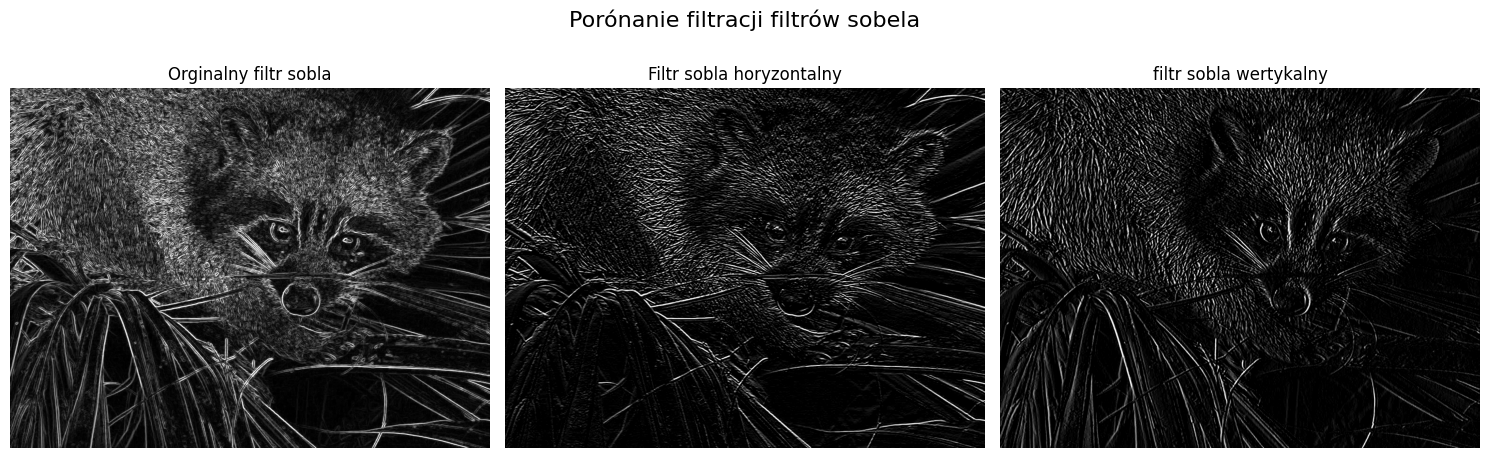

In [5]:
szopsobel_h = filters.sobel_h(szop_g)
szopsobel_v = filters.sobel_v(szop_g)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Porónanie filtracji filtrów sobela", fontsize=16)
axes[0].imshow(sobel, cmap="gray",  vmin=0, vmax=0.3)
axes[0].set_title("Orginalny filtr sobla")
axes[0].axis("off")

axes[1].imshow(szopsobel_h, cmap="gray",  vmin=0, vmax=0.3)
axes[1].set_title("Filtr sobla horyzontalny")
axes[1].axis("off")

axes[2].imshow(szopsobel_v, cmap="gray",  vmin=0, vmax=0.3)
axes[2].set_title("filtr sobla wertykalny")
axes[2].axis("off")
plt.tight_layout()

Pytanie 6

Przykładowy filtr Sobela wykrywający krawędzie pionowe.
[-1 0 1], [-2 0 2], [-1 0 1]

Pytanie 7

Przykładowy filtr Sobela wykrywający krawędzie poziome.
[1 2 1], [0 0 0], [-1 -2 -1]

Punkty 15 - 17

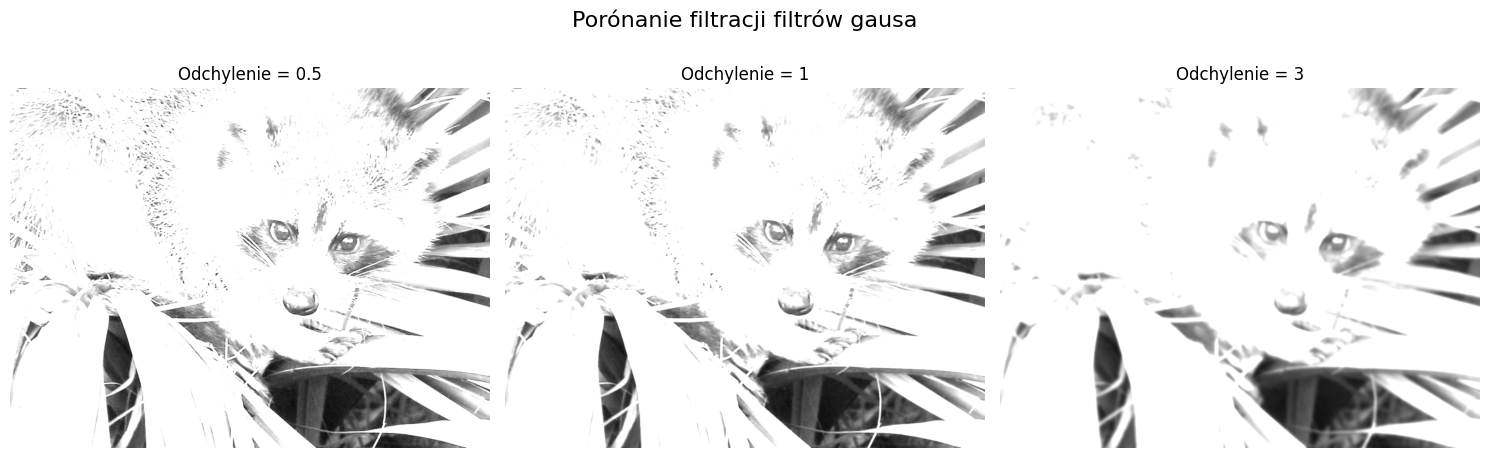

In [6]:
gaus05 = filters. gaussian(szop_g, 0.5)
gaus1 = filters. gaussian(szop_g, 1)
gaus3 = filters. gaussian(szop_g, 3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Porónanie filtracji filtrów gausa", fontsize=16)
axes[0].imshow(gaus05, cmap="gray",  vmin=0, vmax=0.3)
axes[0].set_title("Odchylenie = 0.5")
axes[0].axis("off")

axes[1].imshow(gaus1, cmap="gray",  vmin=0, vmax=0.3)
axes[1].set_title("Odchylenie = 1")
axes[1].axis("off")

axes[2].imshow(gaus3, cmap="gray",  vmin=0, vmax=0.3)
axes[2].set_title("Odchylenie = 3")
axes[2].axis("off")
plt.tight_layout()

Punkty 18 - 19

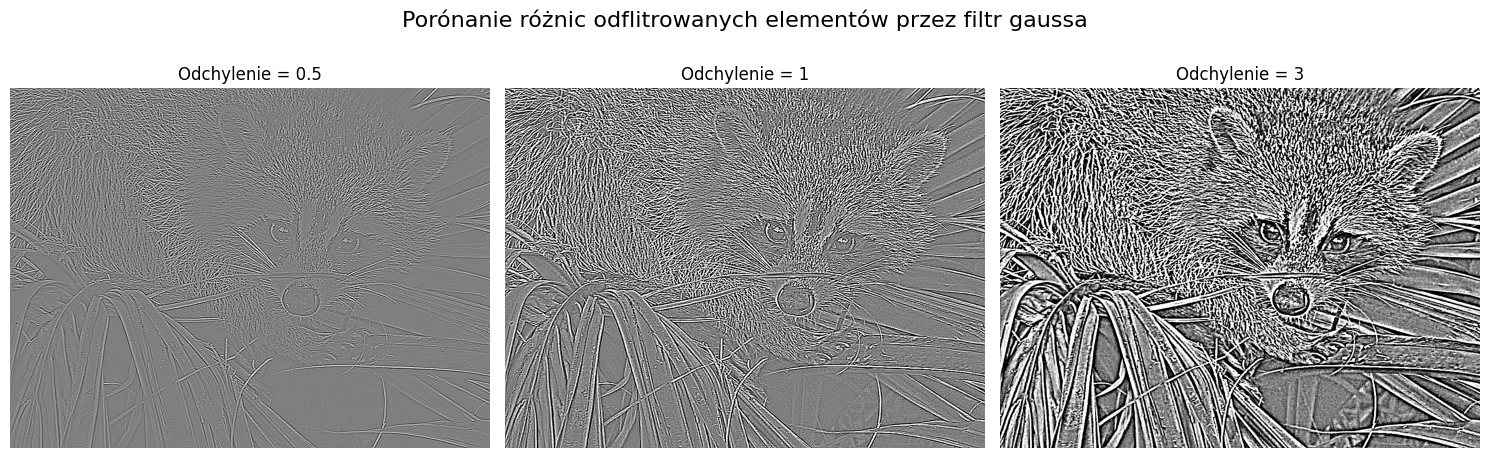

In [7]:
diff_05 = (szop_g - gaus05) * 255
diff_1 = (szop_g - gaus1) * 255
diff_3 = (szop_g - gaus3) * 255

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Porónanie różnic odflitrowanych elementów przez filtr gaussa", fontsize=16)
axes[0].imshow(diff_05, cmap="gray",  vmin=-7, vmax=7)
axes[0].set_title("Odchylenie = 0.5")
axes[0].axis("off")

axes[1].imshow(diff_1, cmap="gray",  vmin=-7, vmax=7)
axes[1].set_title("Odchylenie = 1")
axes[1].axis("off")

axes[2].imshow(diff_3, cmap="gray",  vmin=-7, vmax=7)
axes[2].set_title("Odchylenie = 3")
axes[2].axis("off")
plt.tight_layout()

Pytanie 8

Przykładowa maska dla filtru gaussa o rozmiarze maski 3 x 3 i sigma = 1.

(1/16) * [1 2 1], [2 4 2], [1 2 1]

Punkty 20 - 24

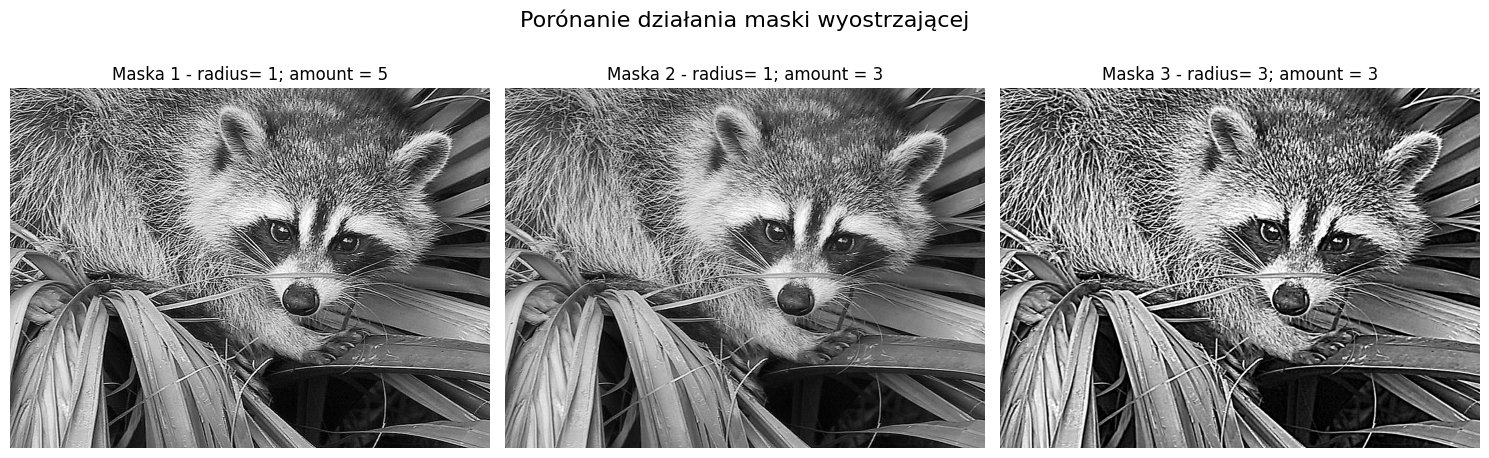

In [8]:
unsharp1 = filters.unsharp_mask(szop_g, radius=1, amount=5)
unsharp2 = filters.unsharp_mask(szop_g, radius=1, amount=3)
unsharp3 = filters.unsharp_mask(szop_g, radius=3, amount=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Porónanie działania maski wyostrzającej", fontsize=16)
axes[0].imshow(unsharp1, cmap="gray")
axes[0].set_title("Maska 1 - radius= 1; amount = 5")
axes[0].axis("off")

axes[1].imshow(unsharp2, cmap="gray")
axes[1].set_title("Maska 2 - radius= 1; amount = 3")
axes[1].axis("off")

axes[2].imshow(unsharp3, cmap="gray")
axes[2].set_title("Maska 3 - radius= 3; amount = 3")
axes[2].axis("off")
plt.tight_layout()

Pytanie 9

Zwiększanie odchylenia standardowego(radius) powoduje większe rozmycie

Zwiększenie amount wzmacnia efekt wyostrzenia, czyli wyostrza krawędzie i detale

Punkty 25 - 27

c:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\VENVS\Lib\site-packages\IPython\core\interactiveshell.py:3546: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


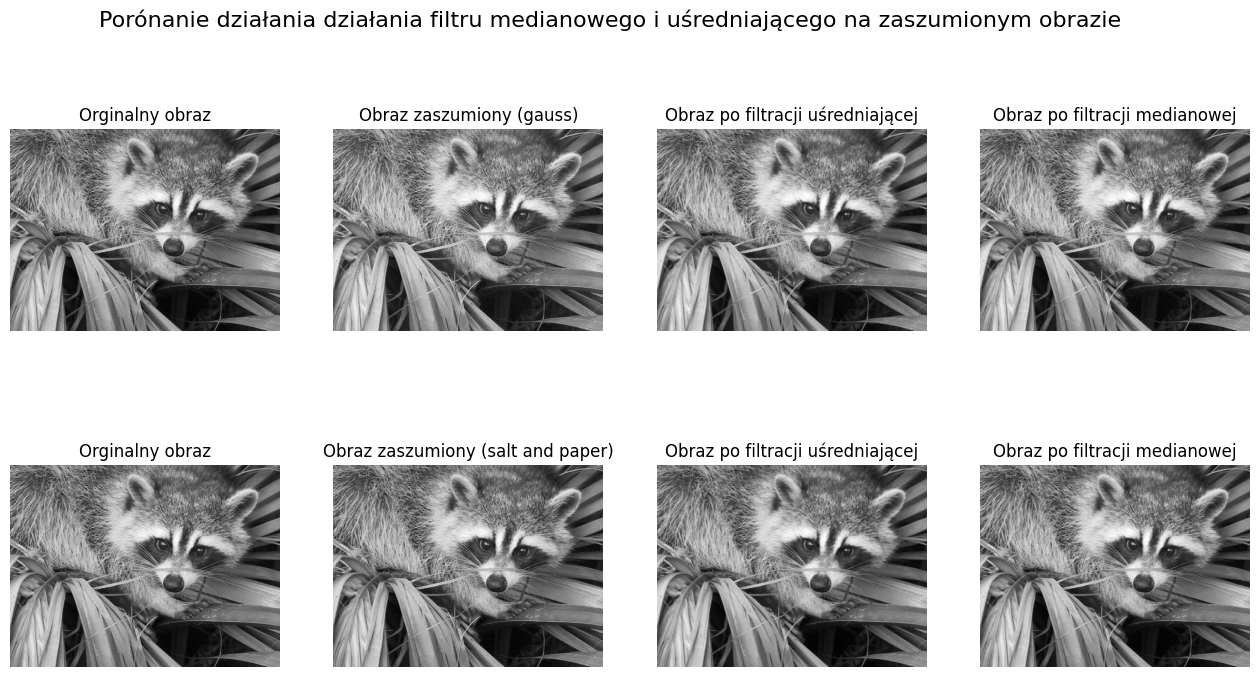

In [9]:
raccoon_noise_gauss_path = r"C:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\lab4\dane4\raccoon_noise_gauss.jpg"
raccoon_salt_and_paper_path = r"C:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\lab4\dane4\raccoon_noise_salt_and_paper.jpg"

szop_gauss = io.imread(raccoon_noise_gauss_path)
szop_salt = io.imread(raccoon_salt_and_paper_path)

szop_gauss_g = rgb2gray(szop_gauss)
szop_salt_g = rgb2gray(szop_salt)

filtered_median_gauss = filt.median(szop_gauss_g, tablica3)
filtered_mean_gauss = filt.mean(szop_gauss_g, tablica3)

filtered_median_salt = filt.median(szop_salt_g, tablica3)
filtered_mean_salt = filt.mean(szop_salt_g, tablica3)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Porónanie działania działania filtru medianowego i uśredniającego na zaszumionym obrazie", fontsize=16)

axs[0, 0].imshow(szop_g, cmap='gray')
axs[0, 0].set_title("Orginalny obraz")
axs[0, 0].axis('off')

axs[0, 1].imshow(szop_gauss_g, cmap='gray')
axs[0, 1].set_title("Obraz zaszumiony (gauss)")
axs[0, 1].axis('off')

axs[0, 2].imshow(filtered_mean_gauss, cmap='gray')
axs[0, 2].set_title("Obraz po filtracji uśredniającej")
axs[0, 2].axis('off')

axs[0, 3].imshow(filtered_median_gauss , cmap='gray')
axs[0, 3].set_title("Obraz po filtracji medianowej")
axs[0, 3].axis('off')

axs[1, 0].imshow(szop_g, cmap='gray')
axs[1, 0].set_title("Orginalny obraz")
axs[1, 0].axis('off')

axs[1, 1].imshow(szop_salt_g, cmap='gray')
axs[1, 1].set_title("Obraz zaszumiony (salt and paper)")
axs[1, 1].axis('off')

axs[1, 2].imshow(filtered_mean_salt, cmap='gray')
axs[1, 2].set_title("Obraz po filtracji uśredniającej")
axs[1, 2].axis('off')

axs[1, 3].imshow(filtered_median_salt, cmap='gray')
axs[1, 3].set_title("Obraz po filtracji medianowej")
axs[1, 3].axis('off')

plt.savefig(r"C:\Users\HP\Desktop\Studia Inżynieria\R2 s2\Przetwarzanie obrazów i grafika komputerowa\Labolatoria\lab4\wynik_filtracja_szop.png")

Pytanie 10

Szumy gaussowskie najlepiej redukują filtry uśredniające i gaussowskie ale niestety powodują też utratę szczegółów.

Szum typu "sól i pieprz" najlepiej redukuje filtr medianowy, który będzie usuwał skrajne wartości bez rozmywania krawędzi.

Obrazy po filtracji są w miarę podobne do obrazu orginalnego ale w zależności od filtru możliwa jest utrata detali.

Punkt 28

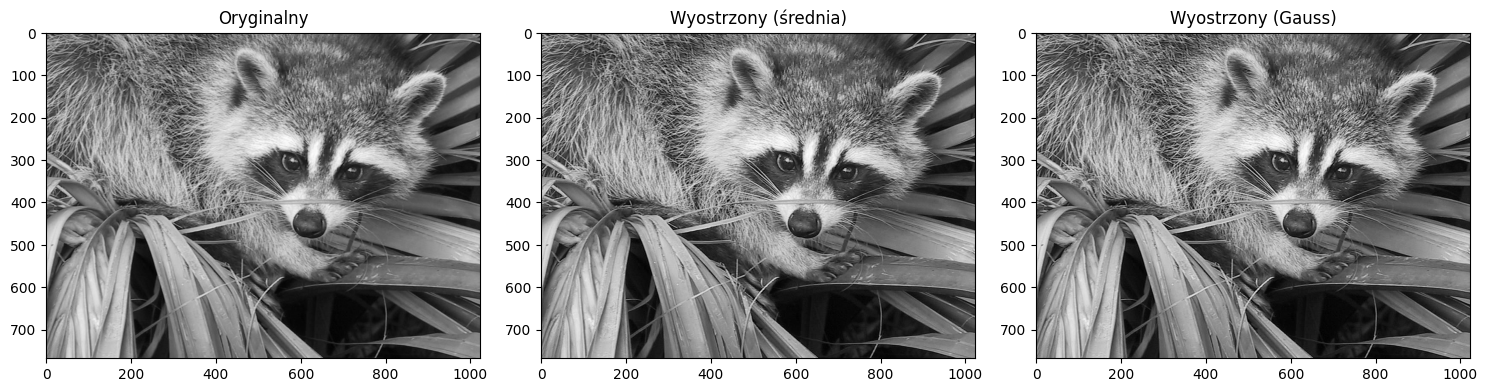

In [10]:
def filtr_mean(image):
    maska = np.ones((3, 3)) / 9
    return sig.convolve2d(image, maska, mode='same', boundary='symm')

def wyostrzanie(image, blur):
    rozmycie = blur(image)
    wyostrzony = image + (image - rozmycie)
    return np.clip(wyostrzony, 0, 1)

wyostrzenie_mean = wyostrzanie(szop_g, filtr_mean)
wyostrzenie_gauss = wyostrzanie(szop_g, lambda img: gaussian_filter(img, sigma=1))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(szop_g, cmap='gray')
axs[0].set_title("Oryginalny")

axs[1].imshow(wyostrzenie_mean, cmap='gray')
axs[1].set_title("Wyostrzony (średnia)")

axs[2].imshow(wyostrzenie_gauss, cmap='gray')
axs[2].set_title("Wyostrzony (Gauss)")

plt.tight_layout()
plt.show()

Punkt 29

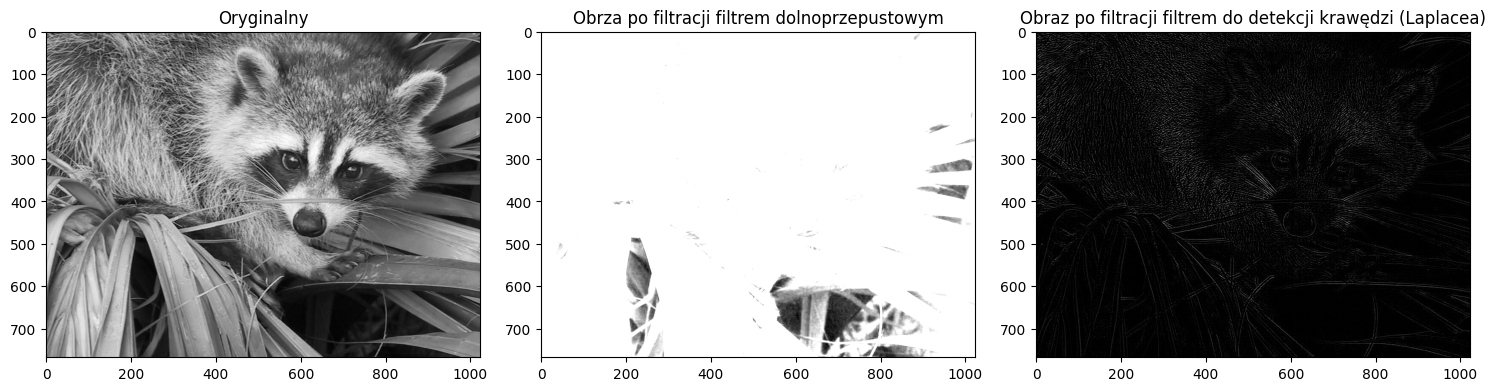

In [13]:
filtr_dolny = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

filtr_laplace = np.array([
    [0, 1, 0], 
    [1, -4, 1], 
    [0, 1, 0]
])

def splot(image, filtr):
    wynik = sig.convolve2d(image, filtr, mode='same', boundary='symm')
    return np.clip(wynik, 0, 1)

szop_dolny = splot(szop_g, filtr_dolny)
szop_gorny = splot(szop_g, filtr_laplace)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(szop_g, cmap='gray')
axs[0].set_title("Oryginalny")

axs[1].imshow(szop_dolny, cmap='gray')
axs[1].set_title("Obrza po filtracji filtrem dolnoprzepustowym")

axs[2].imshow(szop_gorny, cmap='gray')
axs[2].set_title("Obraz po filtracji filtrem do detekcji krawędzi (Laplacea)")

plt.tight_layout()

Punkt 30

Text(0.5, 1.0, 'Obraz po filtracji dowolną maską')

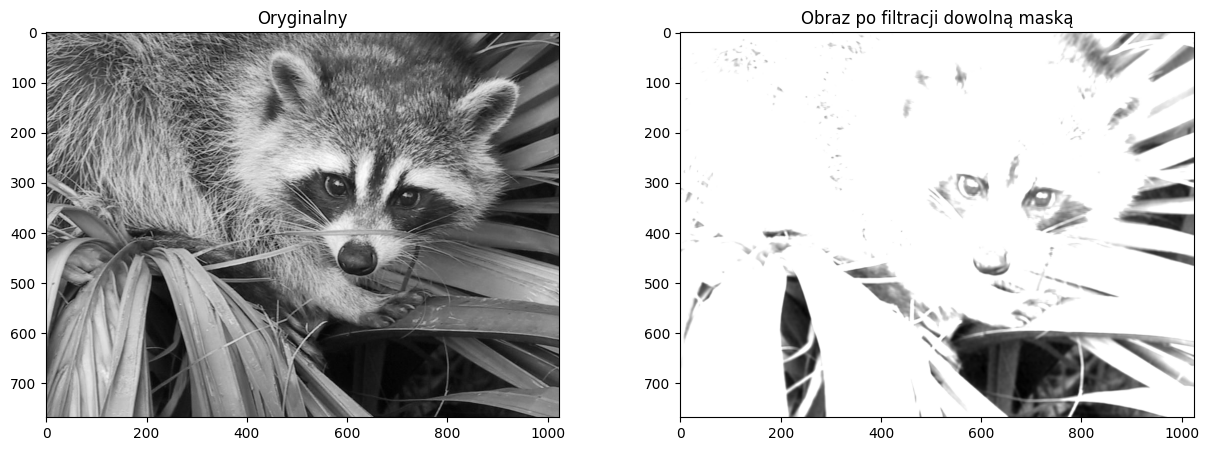

In [14]:
dowolna_maska = np.ones((6, 6)) / 10

szop_dowolna = splot(szop_g, dowolna_maska)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(szop_g, cmap='gray')
axs[0].set_title("Oryginalny")

axs[1].imshow(szop_dowolna, cmap='gray')
axs[1].set_title("Obraz po filtracji dowolną maską")